<a href="https://colab.research.google.com/github/kerrmich2/Append-folder-name-to-front/blob/main/notebooks/survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

In [3]:
%%capture
%%R
install.packages("survminer", verbose=T, keep_outputs=T)
install.packages("ggfortify", verbose=T, keep_outputs=T)
install.packages("gtsummary", verbose=T, keep_outputs=T)

In [4]:
%%R
data <- read.csv("/content/drive/MyDrive/csv/full_data_clusters.csv")
kmeans_no_target <- read.csv("/content/drive/MyDrive/csv/k-means without target.csv")
exit <- read.csv("/content/drive/MyDrive/csv/censored.csv")

In [8]:
%%R
library(survival)
library(survminer)
library(ggfortify)
surv.time <- Surv(data$daysOnProgram)
est.surv <- survfit(surv.time~Cluster, conf.int=0.95,data=data)

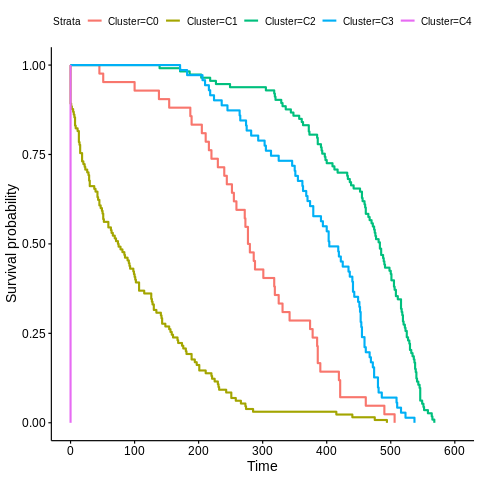

In [ ]:
%%R
ggsurvplot(est.surv, data=data)

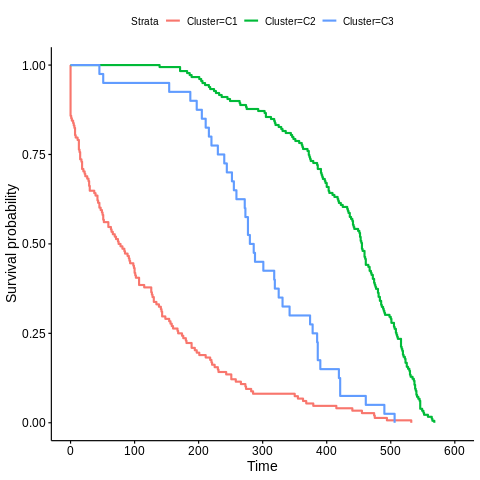

In [ ]:
%%R
surv.time.no_target <- Surv(kmeans_no_target$daysOnProgram)
est.surv <- survfit(surv.time.no_target~Cluster, conf.int=0.95,data=kmeans_no_target)
ggsurvplot(est.surv, data=kmeans_no_target)

In [5]:
%%R
library(dplyr)
library(tidyverse)
kmeans_no_target %>% full_join(exit, by="citizenId") %>%
  select(-c(censor, closeDescription, closeReason.y)) ->
  cluster_surv

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


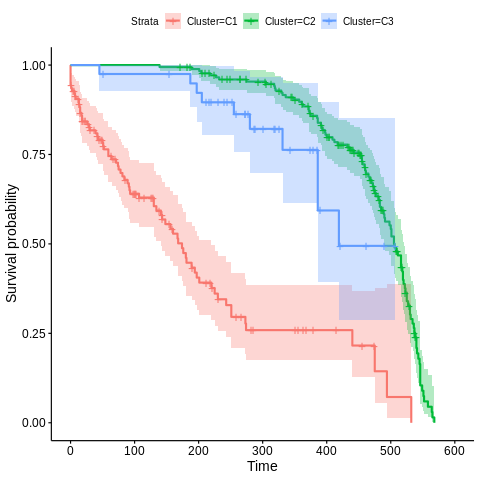

In [10]:
%%R
library(gtsummary)
surv.time.exit <- Surv(cluster_surv$daysOnProgram, cluster_surv$exit)
est.surv.exit <- survfit(surv.time.exit~Cluster, conf.int=0.95,data=cluster_surv)
ggsurvplot(est.surv.exit, data=cluster_surv, conf.int=T)

In [13]:
%%R
cox <- coxph(surv.time.exit~Cluster, data=cluster_surv)
summary(cox)

Call:
coxph(formula = surv.time.exit ~ Cluster, data = cluster_surv)

  n= 360, number of events= 187 
   (7 observations deleted due to missingness)

             coef exp(coef) se(coef)       z Pr(>|z|)    
ClusterC2 -2.0215    0.1325   0.1824 -11.082  < 2e-16 ***
ClusterC3 -1.6452    0.1930   0.3402  -4.836 1.33e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
ClusterC2    0.1325      7.550   0.09264    0.1894
ClusterC3    0.1930      5.182   0.09905    0.3759

Concordance= 0.743  (se = 0.014 )
Likelihood ratio test= 112.3  on 2 df,   p=<2e-16
Wald test            = 127.5  on 2 df,   p=<2e-16
Score (logrank) test = 152.8  on 2 df,   p=<2e-16

